In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df_train = pd.read_csv('Training_dataset_Original.csv')

/home/ashutosh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 49 columns):
application_key    80000 non-null int64
mvar1              80000 non-null object
mvar2              74447 non-null float64
mvar3              79499 non-null float64
mvar4              79499 non-null float64
mvar5              79499 non-null float64
mvar6              80000 non-null object
mvar7              80000 non-null object
mvar8              80000 non-null object
mvar9              80000 non-null object
mvar10             80000 non-null object
mvar11             80000 non-null object
mvar12             80000 non-null object
mvar13             80000 non-null object
mvar14             80000 non-null int64
mvar15             80000 non-null object
mvar16             80000 non-null object
mvar17             80000 non-null object
mvar18             80000 non-null object
mvar19             80000 non-null object
mvar20             80000 non-null object
mvar21             57439 non

In [4]:
df_train = df_train.replace('missing' , np.nan)

In [5]:
df_train = df_train.replace('na' , np.nan)

In [6]:
df_train['mvar47'].unique()

array(['C', 'L'], dtype=object)

In [7]:
df_train['mvar47'].replace(['C','L'],[0,1] ,inplace=True)

In [8]:
df_train = df_train.apply(pd.to_numeric, errors = 'coerce')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 49 columns):
application_key    80000 non-null int64
mvar1              76361 non-null float64
mvar2              74447 non-null float64
mvar3              79499 non-null float64
mvar4              79499 non-null float64
mvar5              79499 non-null float64
mvar6              61036 non-null float64
mvar7              72606 non-null float64
mvar8              61036 non-null float64
mvar9              68592 non-null float64
mvar10             79498 non-null float64
mvar11             35181 non-null float64
mvar12             65922 non-null float64
mvar13             71648 non-null float64
mvar14             80000 non-null int64
mvar15             47933 non-null float64
mvar16             61490 non-null float64
mvar17             64154 non-null float64
mvar18             65229 non-null float64
mvar19             79996 non-null float64
mvar20             79498 non-null float64
mvar21       

In [10]:
df_train.isnull().sum()

application_key        0
mvar1               3639
mvar2               5553
mvar3                501
mvar4                501
mvar5                501
mvar6              18964
mvar7               7394
mvar8              18964
mvar9              11408
mvar10               502
mvar11             44819
mvar12             14078
mvar13              8352
mvar14                 0
mvar15             32067
mvar16             18510
mvar17             15846
mvar18             14771
mvar19                 4
mvar20               502
mvar21             22561
mvar22             29124
mvar23             40248
mvar24             18902
mvar25              7706
mvar26             10610
mvar27             13209
mvar28               502
mvar29               502
mvar30             36417
mvar31             56218
mvar32              7706
mvar33              1751
mvar34               502
mvar35             33014
mvar36              2898
mvar37              7706
mvar38               502
mvar39              6040


In [12]:
from sklearn.impute import SimpleImputer
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_df_train = pd.DataFrame(fill_NaN.fit_transform(df_train))
imputed_df_train.columns = df_train.columns
imputed_df_train.index = df_train.index

In [17]:
from sklearn.model_selection import train_test_split
X = imputed_df_train.drop(['application_key', 'default_ind'], axis = 1)
y = imputed_df_train['default_ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [24]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=2, warm_start=False)

In [25]:
glmMod.score(X_test, y_test)

0.7987878787878788

In [26]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [30]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [31]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [32]:
adaMod.score(X_test, y_test)

0.8040530303030303

In [33]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [44]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [45]:
gbMod.score(X_test, y_test)

0.8095075757575757

In [37]:
from sklearn.preprocessing import RobustScaler

In [38]:
scale = RobustScaler()

In [39]:
X_s = imputed_df_train.drop(['application_key', 'default_ind'], axis = 1)
y_s = imputed_df_train['default_ind']

In [40]:
scaled_X = scale.fit_transform(X_s)

In [41]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(scaled_X, y_s, test_size=0.1, random_state=42)

In [46]:
gbMod_s = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [47]:
gbMod_s.fit(X_s_train, y_s_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [48]:
gbMod_s.score(X_s_test, y_s_test)

0.81375

In [59]:
test_labels=gbMod.predict_proba(X_s_test)[:,1]

In [60]:
roc_auc_score(y_s_test,test_labels , average='macro', sample_weight=None)

0.7358502489739425

In [49]:
from sklearn.preprocessing import FunctionTransformer

In [50]:
transformer = FunctionTransformer(np.log1p, validate=True)
log_X = transformer.fit_transform(X)

In [51]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(log_X, y_s, test_size=0.1, random_state=42)

In [53]:
gbMod_l = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [54]:
gbMod_l.fit(X_l_train, y_l_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [55]:
gbMod_l.score(X_l_test, y_l_test)

0.81375

In [71]:
test_labels=gbMod_l.predict_proba(X_l_test)[:,1]

In [72]:
roc_auc_score(y_l_test,test_labels , average='macro', sample_weight=None)

0.8417777796813447

In [61]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [62]:
rfMod.fit(X_l_train, y_l_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rfMod.score(X_l_test, y_l_test)

0.7935

In [70]:
test_labels=rfMod.predict_proba(X_l_test)[:,1]
roc_auc_score(y_l_test,test_labels , average='macro', sample_weight=None)

0.7966701325579546

In [73]:
#Going with the GradientBoost Model as it has best score of AUC among all tested models

In [76]:
from sklearn.model_selection import cross_val_score
gbMod_l = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
cross_val_score(gbMod_l, log_X, y_s, cv=2)

array([0.80990475, 0.80359509])

In [77]:
basic_df = df_train.fillna(0)

In [78]:
X_b = basic_df.drop(['application_key', 'default_ind'], axis = 1)
y_b = basic_df['default_ind']

In [79]:
transformer = FunctionTransformer(np.log1p, validate=True)
log_X_b = transformer.fit_transform(X_b)

In [80]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(log_X_b, y_b, test_size=0.1, random_state=42)

In [81]:
gbMod_b = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [82]:
gbMod_b.fit(X_b_train, y_b_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [83]:
gbMod_b.score(X_b_test, y_b_test)

0.812875

In [84]:
#bestum bestest
test_labels=gbMod_b.predict_proba(X_b_test)[:,1]
roc_auc_score(y_b_test,test_labels , average='macro', sample_weight=None)

0.8430875876162117

In [85]:
from scipy.stats import spearmanr

In [88]:
rho, pval = spearmanr(df_train)

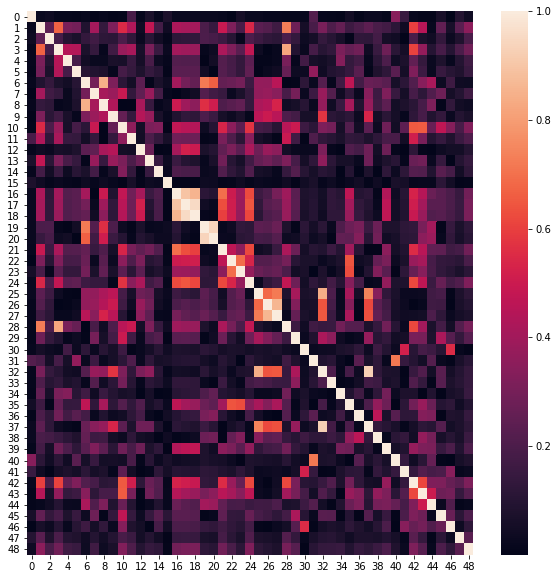

In [92]:
plt.figure(figsize = (10,10))
sns.heatmap(abs(rho))

In [95]:
corr = pd.DataFrame(abs(rho))

In [99]:
feat = corr[48]

In [102]:
feat = np.array(feat)

In [104]:
boo = feat > 0.2

In [105]:
boo

array([False,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False,  True,  True])

In [108]:
sel_columns = df_train.columns.values[boo]

In [111]:
sel_df = imputed_df_train[sel_columns]

In [112]:
sel_df.head()

,mvar1,mvar3,mvar10,mvar11,mvar16,mvar17,mvar18,mvar21,mvar24,mvar28,mvar29,mvar39,mvar42,mvar43,mvar47,default_ind
0,1696.0,0.000,18414.0,1780.0,1.0,1.0,1.0,94.78,72.25,61.0,4532.0,1.0,0.08696,10.0,0.0,0.0
1,1846.0,0.000,13664.0,1780.0,0.0,0.0,0.0,74.25,4.80,30386.0,2281.0,0.0,0.00000,13.0,1.0,1.0
2,1745.0,0.000,2536.0,1780.0,0.0,0.0,0.0,59.69,40.44,669.0,4623.0,0.0,0.00000,1.0,0.0,1.0
3,1739.0,0.000,37013.0,1780.0,0.0,0.0,0.0,59.69,0.00,91.0,5992.0,0.0,0.15385,3.0,1.0,0.0
4,1787.0,0.225,4696.0,1780.0,0.0,0.0,0.0,20.51,28.72,487.0,2707.0,0.0,0.00000,1.0,1.0,0.0


In [113]:
X_sel = sel_df.drop(['default_ind'], axis = 1)
y_sel = sel_df['default_ind']

In [114]:
transformer = FunctionTransformer(np.log1p, validate=True)
log_X_sel = transformer.fit_transform(X_sel)
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(log_X_sel, y_sel, test_size=0.33, random_state=42)

In [115]:
gbMod_sel = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
gbMod_sel.fit(X_sel_train, y_sel_train)
gbMod_sel.score(X_sel_test, y_sel_test)
test_labels=gbMod_sel.predict_proba(X_sel_test)[:,1]
roc_auc_score(y_sel_test,test_labels , average='macro', sample_weight=None)

0.8189737810284409

In [116]:
gbMod_sel.score(X_sel_test, y_sel_test)

0.7963636363636364

In [117]:
roc_auc_score(y_sel_test,test_labels , average='macro', sample_weight=None)

0.8189737810284409

In [118]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(.95)
pca_X = pca.fit_transform(log_X)
pca_y = y_sel

In [134]:
pca_X = pca.fit(log_X)
pca.n_components_

17

In [ ]:
gbMod_pca.score(X_pca_test, y_pca_test)

In [131]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_X, pca_y, test_size=0.33, random_state=42)

In [132]:
gbMod_pca = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
gbMod_pca.fit(X_pca_train, y_pca_train)
gbMod_pca.score(X_pca_test, y_pca_test)
test_labels=gbMod_pca.predict_proba(X_pca_test)[:,1]
roc_auc_score(y_pca_test,test_labels , average='macro', sample_weight=None)

0.802922369120732

In [133]:
gbMod_pca.score(X_pca_test, y_pca_test)

0.78375

In [135]:
#HyperParameter Tunings

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [137]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [138]:
#Simple DataSet

In [139]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(log_X, y_s)

/home/ashutosh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=5, n_estimators=97 .....................
[CV] ...... loss=deviance, max_depth=5, n_estimators=97, total= 2.8min
[CV] loss=deviance, max_depth=5, n_estimators=97 .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV] ...... loss=deviance, max_depth=5, n_estimators=97, total= 2.8min
[CV] loss=deviance, max_depth=5, n_estimators=97 .....................
[CV] ...... loss=deviance, max_depth=5, n_estimators=97, total= 2.8min
[CV] loss=deviance, max_depth=7, n_estimators=394 ....................


KeyboardInterrupt: 

NameError: name 'test' is not defined